In [19]:
%pwd
%cd ..
%cd ultralytics

/home/areebadnan/Areeb_code/work/Atheritia
/home/areebadnan/Areeb_code/work/Atheritia/ultralytics


/home/areebadnan/Areeb_Python_Environments/yolo_env1/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [20]:
from ultralytics import YOLO
import torch
import copy

model_yaml = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/ultralytics/cfg/models/v8/yolov8l-test3.yaml", task= "detect")

In [21]:
model_1 = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/17logos_head_17logosbase_L/train/weights/best.pt") # 22 layers
model_2 = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/47_(10)_logos_head_17logosbase_L_3/train/weights/best.pt") # 14 layers 
model_3 = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/All_models/Large/47_37_retrainbest.pt") #14 layers 

In [22]:
def compare_dicts(state_dict1, state_dict2):
    # Compare the keys
    keys1 = set(state_dict1.keys())
    keys2 = set(state_dict2.keys())

    if keys1 != keys2:
        print("Models have different parameter names.")
        return False

    # Compare the values (weights)
    for key in keys1:
        if not torch.equal(state_dict1[key], state_dict2[key]):
            print(f"Weights for parameter '{key}' are different.")
            if "bn" in key and "22" not in key:
              state_dict1[key] = state_dict2[key]

In [23]:
model_1_state_dict_head = dict()
model_2_state_dict_head = dict()
model_3_state_dict_head = dict()

In [24]:
model_1_state_dict_base = dict()  # Initialize a new dictionary to hold the copied state

# Loop through all layers from model.0 to model.21
for k, v in model_1.state_dict().items():
    # Loop from 0 to 21 to cover model.0 to model.21
    for i in range(22):  # Use range(22) to cover indices from 0 to 21
        prefix = f"model.model.{i}."  # Add a period at the end to avoid partial matches
        if k.startswith(prefix):
            # Copy the state dictionary to the new dictionary
            model_1_state_dict_base[k] = v
            break  # Stop the inner loop once a match is found

# Now, model_1_state_dict contains all the state dictionaries from model.0 to model.21


In [25]:
for k, v in model_1.state_dict().items():
  if k.startswith("model.model.22"):
    model_1_state_dict_head[k.replace("model.22", "model.40")] = v

In [26]:
layers_to_save = [13, 14, 15, 16, 17, 18, 19, 20, 21]
model_2_state_dict_base = dict()

# Iterate over the model's state dictionary
for k, v in model_2.state_dict().items():
    # Check if the layer matches any in layers_to_save
    for layer in layers_to_save:
        if k.startswith(f"model.model.{layer}"):
            # Rename the layer by shifting the index (e.g., model.13 -> model.22)
            new_layer_index = layer + 9
            new_key = k.replace(f"model.model.{layer}", f"model.model.{new_layer_index}")
            
            # Store the new key-value pair in the new state dict
            model_2_state_dict_base[new_key] = v

In [27]:
for k, v in model_2.state_dict().items():
  if k.startswith("model.model.22"):
    model_2_state_dict_head[k.replace("model.22", "model.41")] = v

In [28]:
layers_to_save = [13, 14, 15, 16, 17, 18, 19, 20, 21]
model_3_state_dict_base = dict()

# Iterate over the model's state dictionary
for k, v in model_3.state_dict().items():
    # Check if the layer matches any in layers_to_save
    for layer in layers_to_save:
        if k.startswith(f"model.model.{layer}"):
            # Rename the layer by shifting the index (e.g., model.13 -> model.22)
            new_layer_index = layer + 18
            new_key = k.replace(f"model.model.{layer}", f"model.model.{new_layer_index}")
            
            # Store the new key-value pair in the new state dict
            model_3_state_dict_base[new_key] = v

In [29]:
for k, v in model_3.state_dict().items():
  if k.startswith("model.model.22"):
    model_3_state_dict_head[k.replace("model.22", "model.42")] = v

In [30]:
model_yaml.load_state_dict(model_1_state_dict_base, strict=False)

_IncompatibleKeys(missing_keys=['model.model.24.cv1.conv.weight', 'model.model.24.cv1.bn.weight', 'model.model.24.cv1.bn.bias', 'model.model.24.cv1.bn.running_mean', 'model.model.24.cv1.bn.running_var', 'model.model.24.cv2.conv.weight', 'model.model.24.cv2.bn.weight', 'model.model.24.cv2.bn.bias', 'model.model.24.cv2.bn.running_mean', 'model.model.24.cv2.bn.running_var', 'model.model.24.m.0.cv1.conv.weight', 'model.model.24.m.0.cv1.bn.weight', 'model.model.24.m.0.cv1.bn.bias', 'model.model.24.m.0.cv1.bn.running_mean', 'model.model.24.m.0.cv1.bn.running_var', 'model.model.24.m.0.cv2.conv.weight', 'model.model.24.m.0.cv2.bn.weight', 'model.model.24.m.0.cv2.bn.bias', 'model.model.24.m.0.cv2.bn.running_mean', 'model.model.24.m.0.cv2.bn.running_var', 'model.model.24.m.1.cv1.conv.weight', 'model.model.24.m.1.cv1.bn.weight', 'model.model.24.m.1.cv1.bn.bias', 'model.model.24.m.1.cv1.bn.running_mean', 'model.model.24.m.1.cv1.bn.running_var', 'model.model.24.m.1.cv2.conv.weight', 'model.model.24

In [31]:
model_yaml.load_state_dict(model_2_state_dict_base, strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [32]:
model_yaml.load_state_dict(model_1_state_dict_head,strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [33]:
model_yaml.load_state_dict(model_2_state_dict_head,strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [34]:
model_yaml.load_state_dict(model_3_state_dict_base,strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [35]:
model_yaml.load_state_dict(model_3_state_dict_head,strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [36]:
#17 logo model head
model_1_output = model_1.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic14.jpg")[0]


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic14.jpg: 288x640 2 Nikes, 2 Coca-Colas, 1 bwin, 105.0ms
Speed: 1.8ms preprocess, 105.0ms inference, 95.3ms postprocess per image at shape (1, 3, 288, 640)


In [37]:
#10 logo model head 
model_2_output = model_2.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic14.jpg")[0]


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic14.jpg: 288x640 2 BetWays, 12.7ms
Speed: 1.1ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 640)


In [38]:
#Jansher logo model head 
model_3_output = model_3.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic14.jpg")[0]


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic14.jpg: 288x640 2 Hyundais, 3 Autoheros, 2 Berliner Kindls, 2 94,3 rs2s, 12.5ms
Speed: 1.0ms preprocess, 12.5ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 640)


In [39]:
#17+10 logo model head 
merged_output = model_yaml.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic14.jpg")[0]


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic14.jpg: 288x640 2 4s, 2 8s, 1 13, 2 21s, 2 44s, 3 56s, 2 60s, 2 63s, 46.2ms
Speed: 1.0ms preprocess, 46.2ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 640)


In [40]:
model_yaml.names

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '10',
 11: '11',
 12: '12',
 13: '13',
 14: '14',
 15: '15',
 16: '16',
 17: '17',
 18: '18',
 19: '19',
 20: '20',
 21: '21',
 22: '22',
 23: '23',
 24: '24',
 25: '25',
 26: '26',
 27: '27',
 28: '28',
 29: '29',
 30: '30',
 31: '31',
 32: '32',
 33: '33',
 34: '34',
 35: '35',
 36: '36',
 37: '37',
 38: '38',
 39: '39',
 40: '40',
 41: '41',
 42: '42',
 43: '43',
 44: '44',
 45: '45',
 46: '46',
 47: '47',
 48: '48',
 49: '49',
 50: '50',
 51: '51',
 52: '52',
 53: '53',
 54: '54',
 55: '55',
 56: '56',
 57: '57',
 58: '58',
 59: '59',
 60: '60',
 61: '61',
 62: '62',
 63: '63'}

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
def show_output(images):
    image = np.vstack(images)
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fig.set_size_inches((5,15))
    ax.imshow(image[...,::-1])

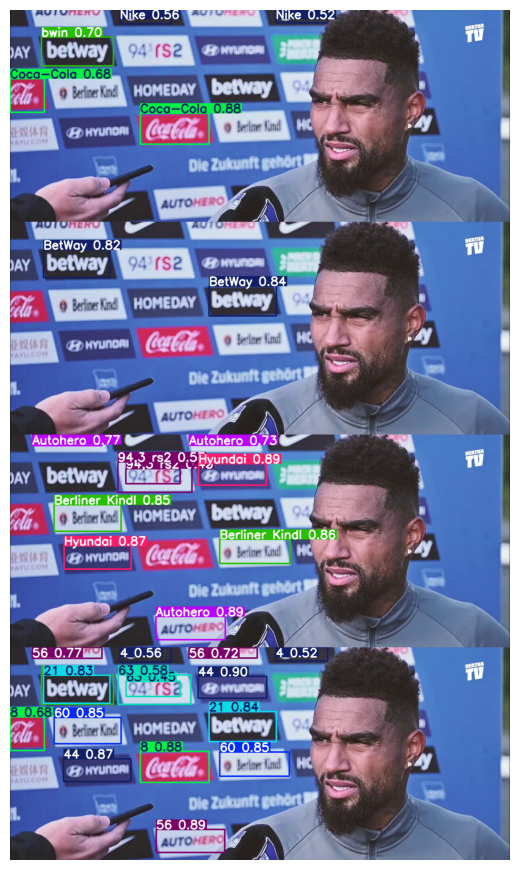

In [43]:
show_output([model_1_output.plot(), model_2_output.plot(), model_3_output.plot() ,merged_output.plot()])

In [44]:
# Assuming this is our merged model
torch.save(model_yaml, '/home/areebadnan/Areeb_code/work/Atheritia/All_models/Large/14layers_freeze_3heads_merged_retrain.pt')

: 